In [1]:
from retentioneering import init_config
from retentioneering import datasets
import pandas as pd
import numpy as np

data = datasets.load_simple_shop()

%load_ext autoreload
%autoreload 2

init_config(
    experiments_folder='experiments', # folder for saving experiment results: graph visualization, heatmaps and etc.
    index_col='client_id', # column by which we split users / sessions / whatever
    event_col='event', # column that describes event
    event_time_col='timestamp', # column that describes timestamp of event
    positive_target_event='payment_done', # name of positive target event
    negative_target_event='lost', # name of negative target event
    pos_target_definition={ # how to define positive event, e.g. empty means that add passed for whom was not 'lost'
        'event_list': ['payment_done']
    },
    neg_target_definition={}
)

In [2]:
# test_user = data[data['client_id']==629881395]
# data = test_user.retention.prepare()
# data = data.retention.split_sessions(thresh=1800, eos_event = 'end_of_session')

In [3]:
data = data.retention.prepare()

data = data.retention.split_sessions(thresh=1800, eos_event = 'end_of_session')

# test step matrix

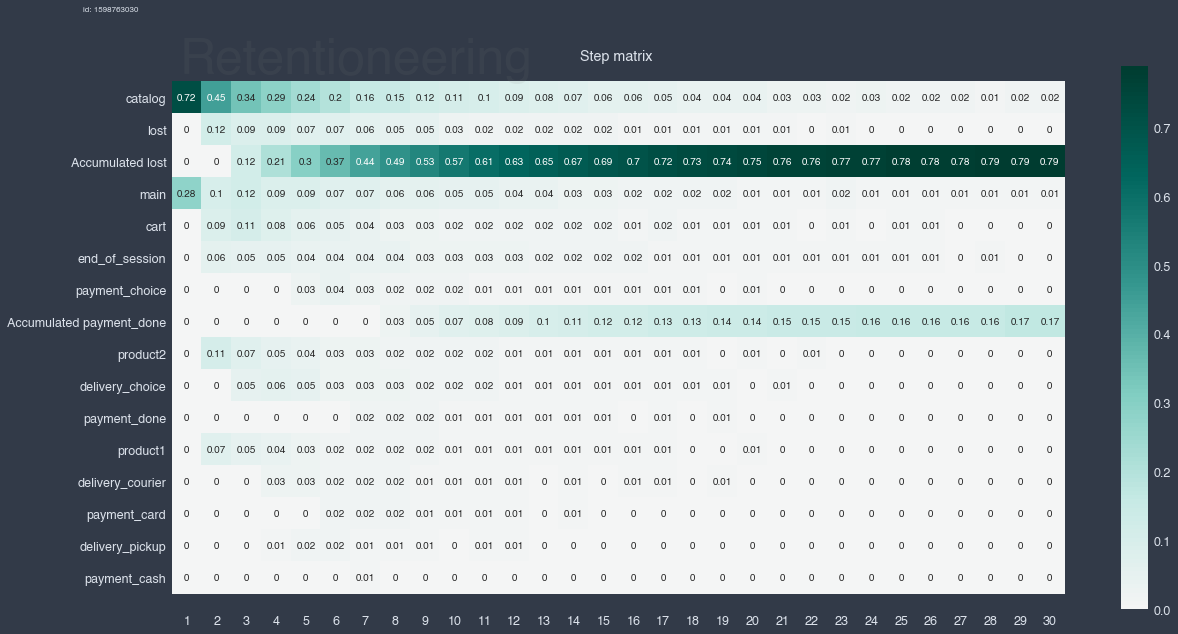

In [4]:
test = data.retention.get_step_matrix(max_steps=30, 
                                       weight_col=None);

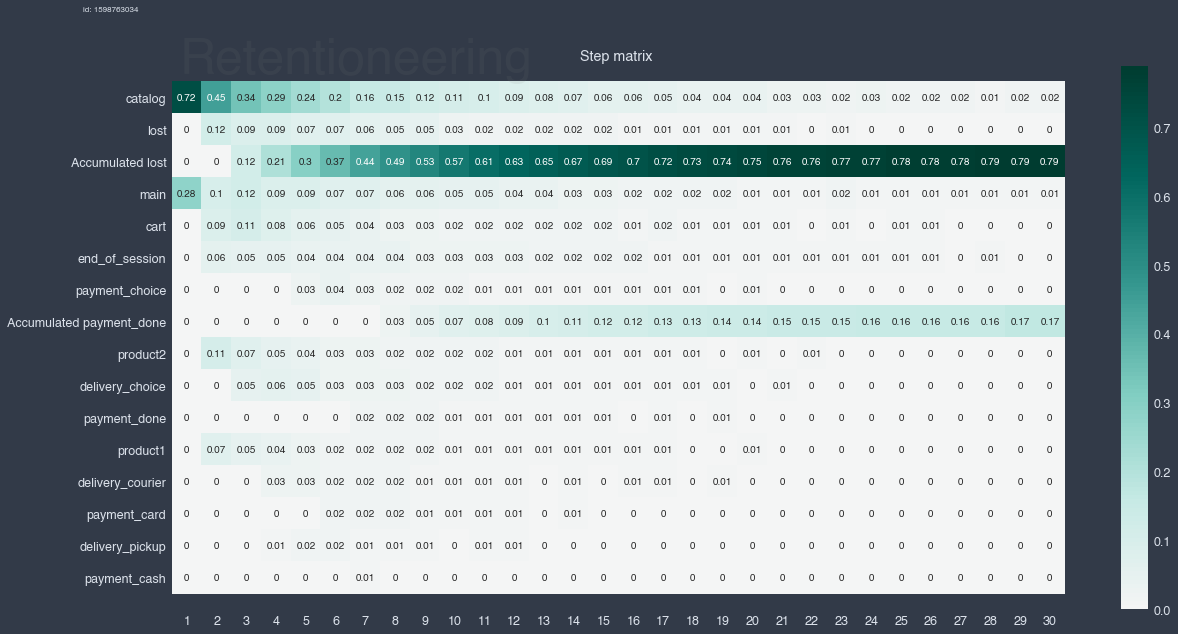

In [5]:
data.retention.get_step_matrix(max_steps=30, 
                               weight_col=None,
                               thr = 0);

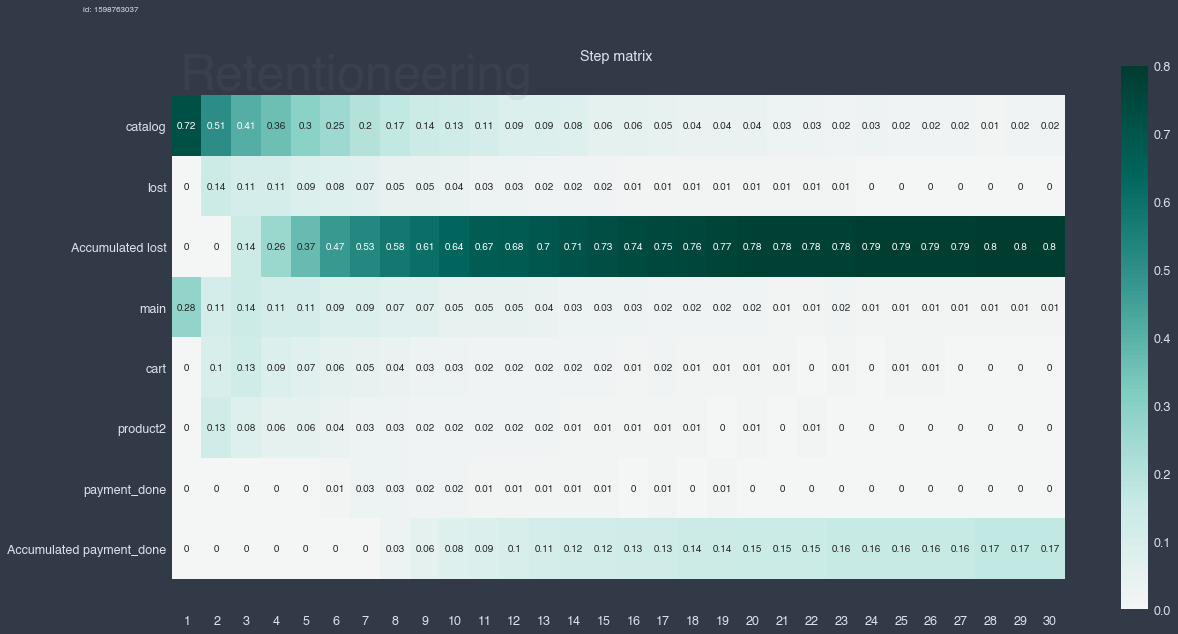

In [6]:
data.retention.get_step_matrix(max_steps=30, 
                               weight_col=None,
                               thr = 0.1);

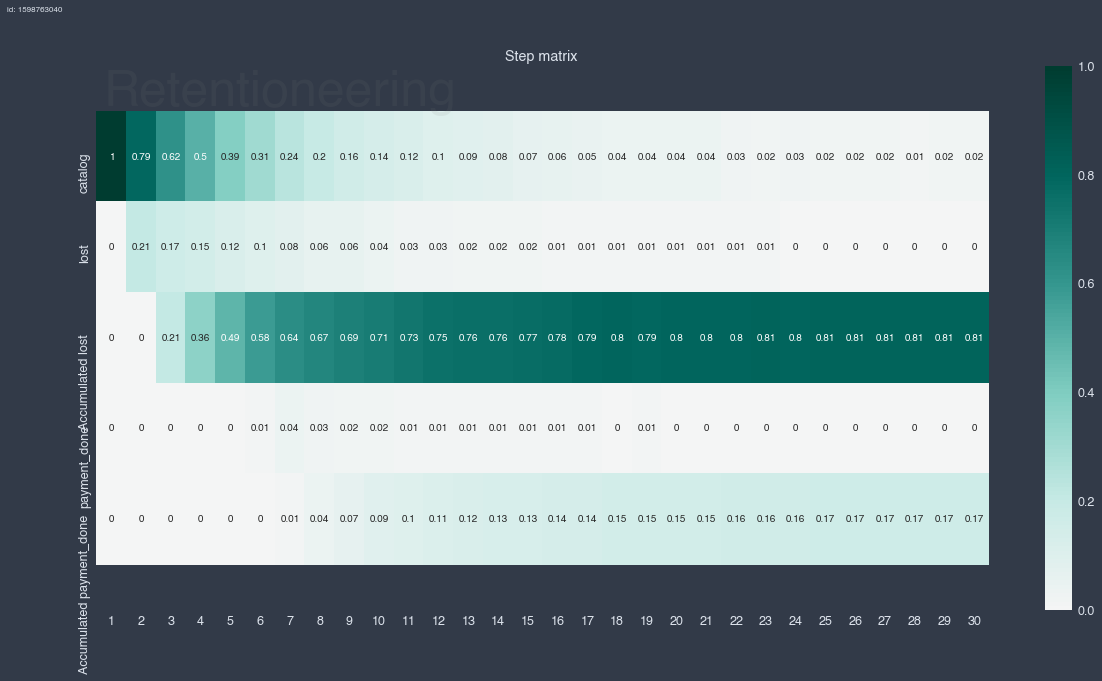

In [7]:
data.retention.get_step_matrix(max_steps=30, 
                               weight_col=None,
                               thr = 0.5);

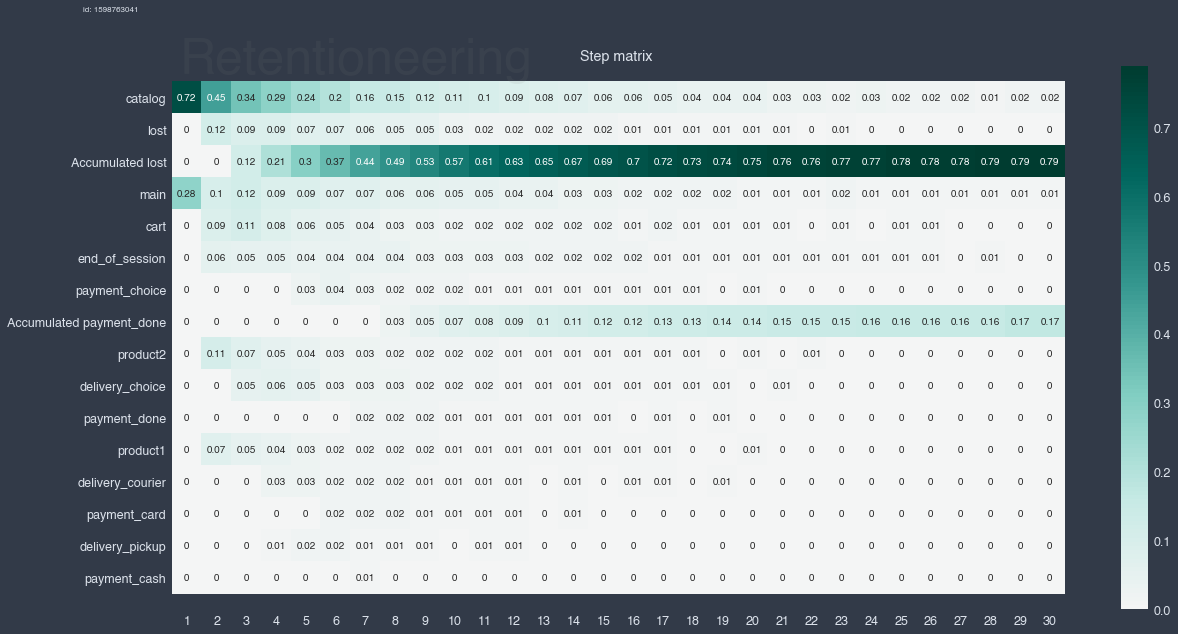

In [8]:
test = data.retention.get_step_matrix(max_steps=30, 
                               weight_col='client_id');

In [9]:
test.sum()

1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
dtype: float64

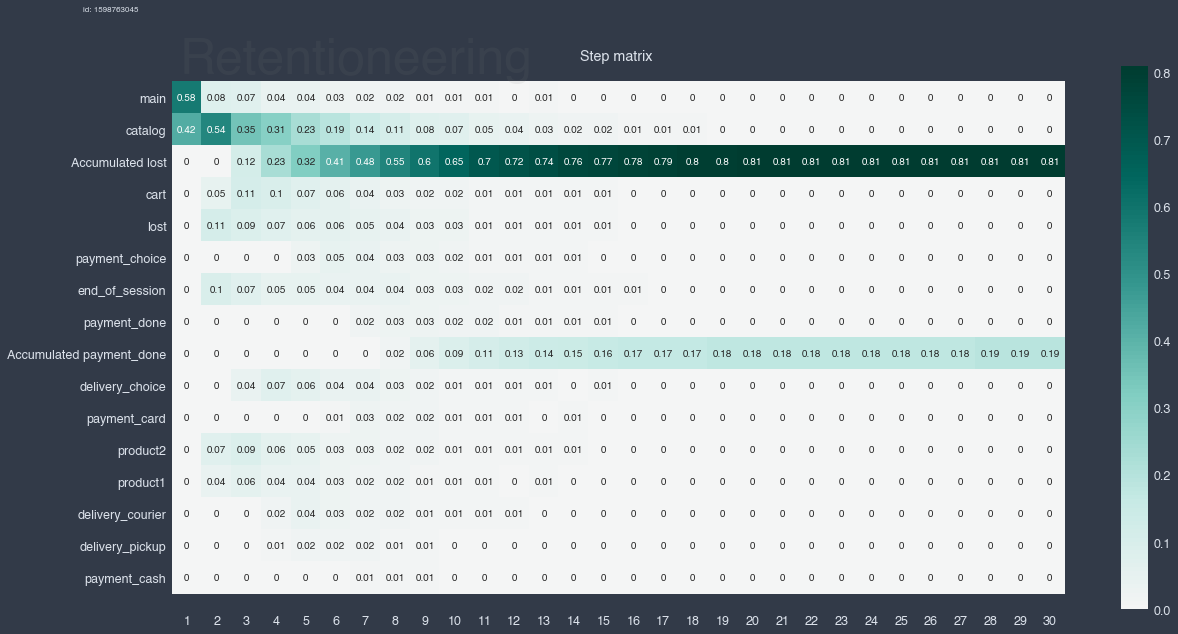

In [10]:
# WHY ACCUMULATED NOT SUM TO 1 ??
test = data.retention.get_step_matrix(max_steps=30, 
                               weight_col='session_id');

In [11]:
test.sum()

1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
dtype: float64

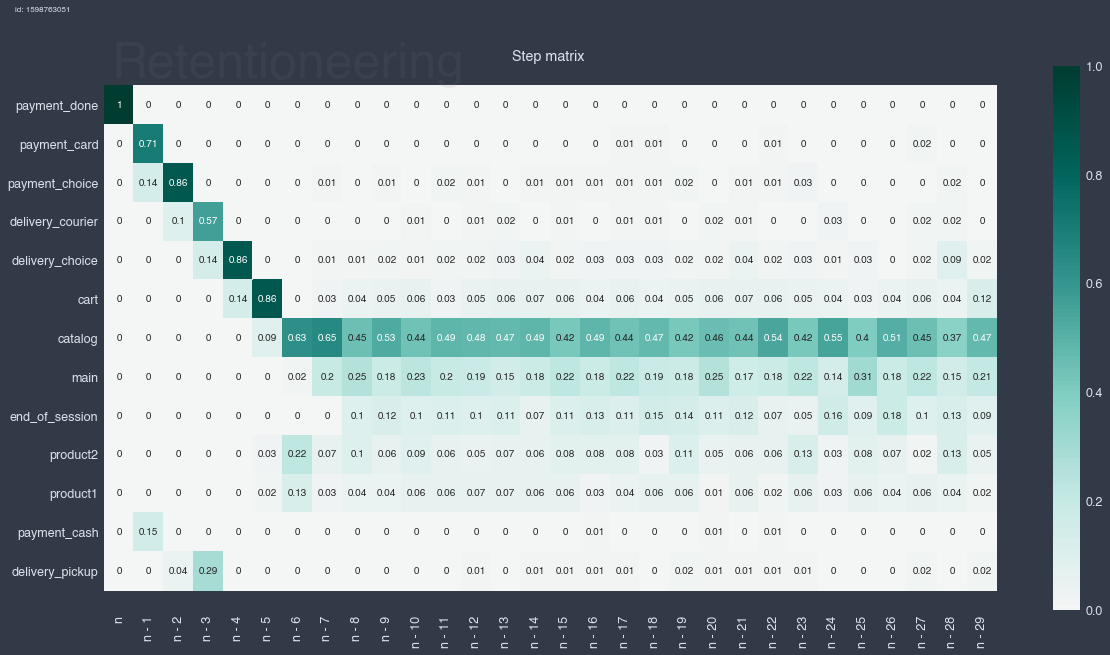

In [12]:
data.retention.get_step_matrix(max_steps=30, reverse = 'pos');

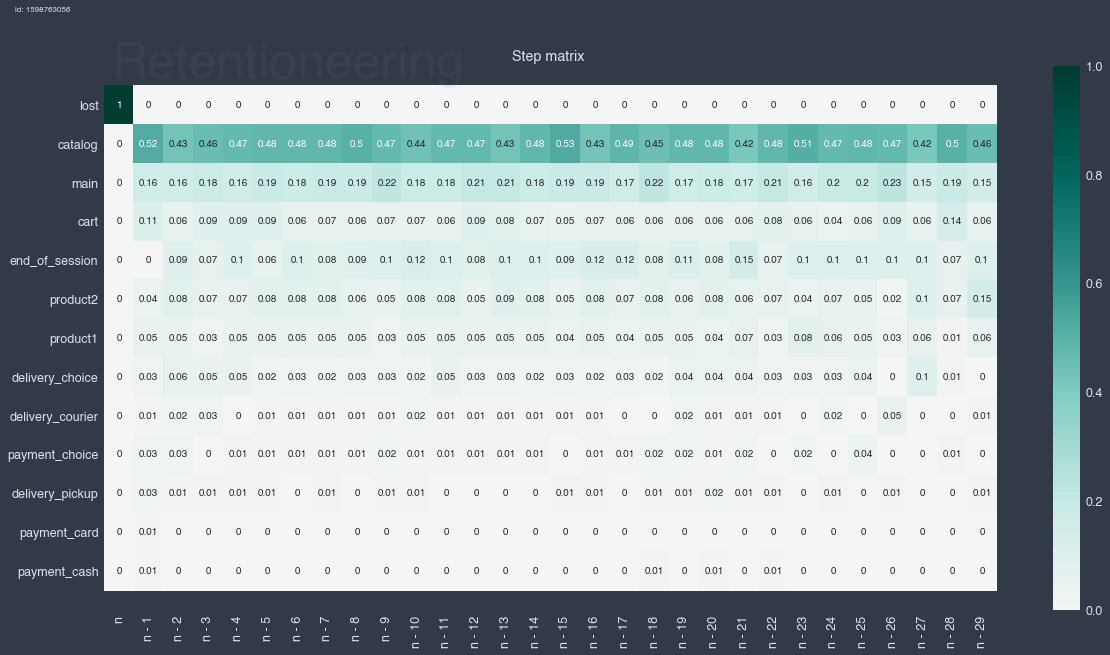

In [13]:
test = data.retention.get_step_matrix(max_steps=30, reverse = 'neg');

In [14]:
test.sum()

n         1.0
n - 1     1.0
n - 2     1.0
n - 3     1.0
n - 4     1.0
n - 5     1.0
n - 6     1.0
n - 7     1.0
n - 8     1.0
n - 9     1.0
n - 10    1.0
n - 11    1.0
n - 12    1.0
n - 13    1.0
n - 14    1.0
n - 15    1.0
n - 16    1.0
n - 17    1.0
n - 18    1.0
n - 19    1.0
n - 20    1.0
n - 21    1.0
n - 22    1.0
n - 23    1.0
n - 24    1.0
n - 25    1.0
n - 26    1.0
n - 27    1.0
n - 28    1.0
n - 29    1.0
dtype: float64

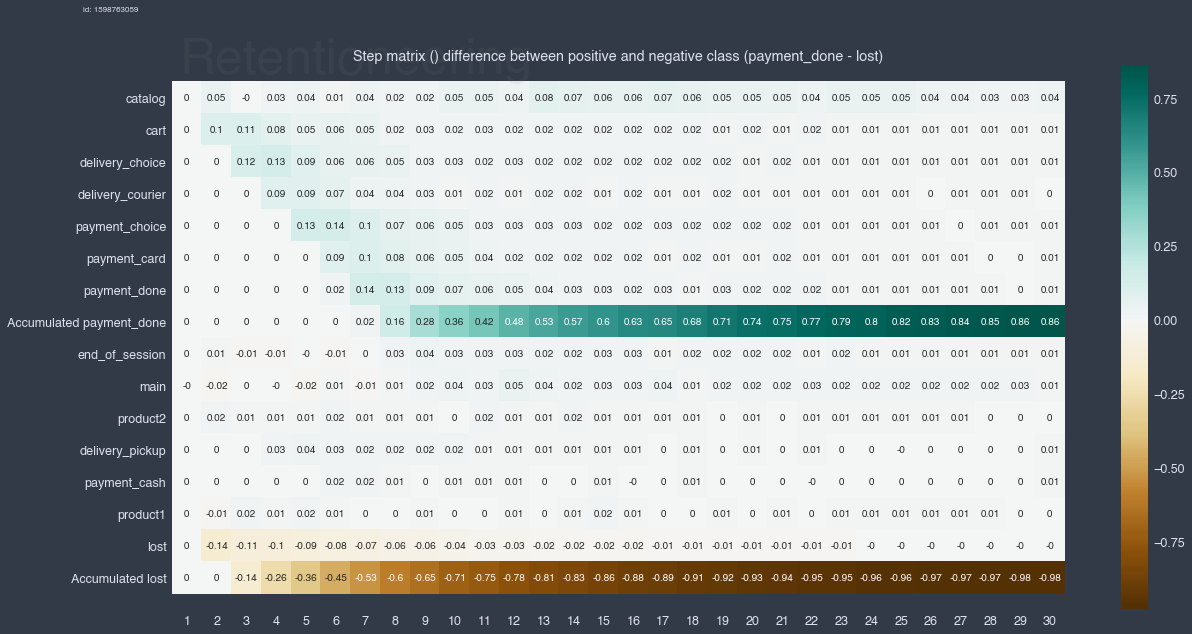

In [15]:
# create group filter based on target events
diff_filter = data.retention.create_filter()


# calculate difference table between two groups
diff_table = data.retention.get_step_matrix_difference(diff_filter, max_steps=30)

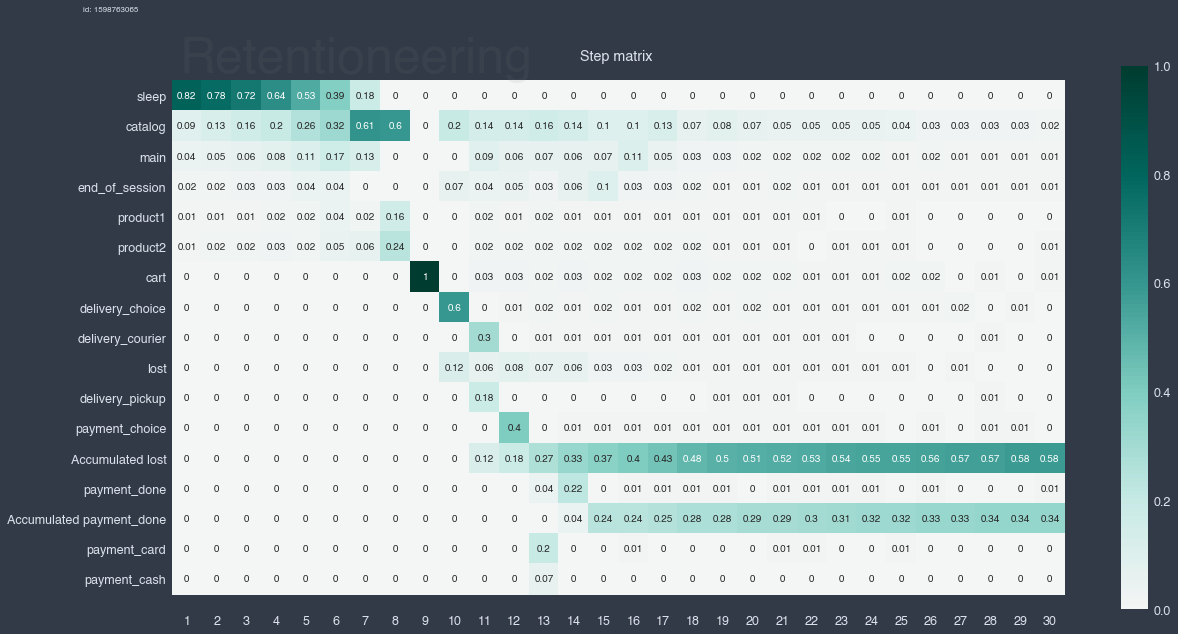

In [16]:
data_prod = data.retention.filter_event_window('cart', neighbor_range=8)
data_prod.retention.get_step_matrix(max_steps=30);

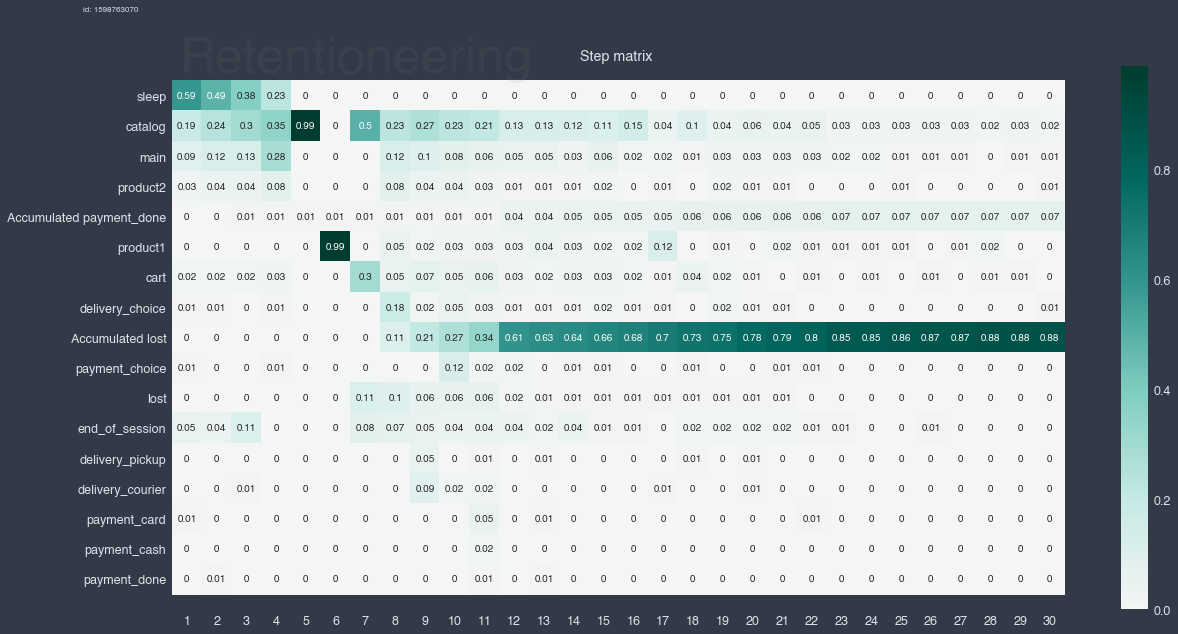

In [17]:
data_prod = data.retention.filter_event_window('product1', neighbor_range=5)
data_prod.retention.get_step_matrix(max_steps=30);